In [1]:
import pandas as pd
import numpy as np
import cv2
import os
import glob
from skimage.filters import gaussian
from skimage import img_as_ubyte
import matplotlib.pyplot as plt

images_list_b = []
SIZE = 128

path = "/home/abbas/pict2/ben/*.*"

#First create a stack array of all images
for file in glob.glob(path):
    print(file)     #just stop here to see all file names printed
    img= cv2.imread(file,1)  #now, we can read each file since we have the full path
    img = cv2.resize(img, (SIZE, SIZE))
    img=img.flatten()
    images_list_b.append(img)
        
images_list_b = np.array(images_list_b)

# #Process each slice in the stack
# img_number = 1
# for image in range(images_list_b.shape[0]):
#     input_img = images_list_b[image,:,:]  #Grey images. For color add another dim.
#     smoothed_image = img_as_ubyte(gaussian(input_img, sigma=5, mode='constant', cval=0.0))
#     cv2.imwrite("test_images/smoothed/smoothed_image"+str(img_number)+".jpg", smoothed_image)
#     img_number +=1  



/home/abbas/pict2/ben/15.jpeg
/home/abbas/pict2/ben/8.jpeg
/home/abbas/pict2/ben/13.jpeg
/home/abbas/pict2/ben/19.jpeg
/home/abbas/pict2/ben/18.jpeg
/home/abbas/pict2/ben/14.jpeg
/home/abbas/pict2/ben/12.jpeg
/home/abbas/pict2/ben/4.jpeg
/home/abbas/pict2/ben/10.jpeg
/home/abbas/pict2/ben/20.jpeg
/home/abbas/pict2/ben/16.jpeg
/home/abbas/pict2/ben/5.jpeg
/home/abbas/pict2/ben/11.jpeg
/home/abbas/pict2/ben/2.jpeg
/home/abbas/pict2/ben/9.jpeg
/home/abbas/pict2/ben/6.jpeg
/home/abbas/pict2/ben/1.jpeg
/home/abbas/pict2/ben/17.jpeg
/home/abbas/pict2/ben/7.jpeg
/home/abbas/pict2/ben/3.jpeg


In [2]:
images_list_m = []
SIZE = 128

path = "/home/abbas/pict2/monica/*.*"

#First create a stack array of all images
for file in glob.glob(path):
    print(file)     #just stop here to see all file names printed
    img= cv2.imread(file,1)  #now, we can read each file since we have the full path
    img = cv2.resize(img, (SIZE, SIZE))
    img=img.flatten()
    images_list_m.append(img)
        
images_list_m = np.array(images_list_m)

# #Process each slice in the stack
# img_number = 1
# for image in range(images_list_m.shape[0]):
#     input_img = images_list_m[image,:,:]  #Grey images. For color add another dim.
#     smoothed_image = img_as_ubyte(gaussian(input_img, sigma=5, mode='constant', cval=0.0))
#     cv2.imwrite("test_images/smoothed/smoothed_image"+str(img_number)+".jpg", smoothed_image)
#     img_number +=1  





/home/abbas/pict2/monica/018.jpeg
/home/abbas/pict2/monica/012.jpeg
/home/abbas/pict2/monica/009.jpeg
/home/abbas/pict2/monica/017.jpeg
/home/abbas/pict2/monica/014.jpeg


In [3]:
y1=np.zeros(20)
y2=np.ones(5)

In [4]:
y=np.concatenate((y1,y2),axis=0)
y



array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 1., 1., 1., 1.])

In [5]:
y.shape



(25,)

In [6]:
x1=images_list_b
x2=images_list_m



In [7]:
x=np.concatenate((x1,x2),axis=0)
x.shape


(25, 49152)

In [86]:
from sklearn.model_selection import train_test_split
data=[]
cr = []
i = 0
while i <= 10:
    x_train , x_test , y_train , y_test = train_test_split(x,y , test_size = 0.2 ,shuffle=True)
    svm = SVC(kernel = 'poly',degree=2,C=1)
    svm.fit(x_train,y_train)
    SVM_Score = accuracy_score(y_test,svm.predict(x_test))
    print(SVM_Score)
    data.append(SVM_Score)
    cf = classification_report(y_test,svm.predict(x_test))
    print(cf)
    cr.append(cf)
    i += 1

0.6
              precision    recall  f1-score   support

         0.0       0.60      1.00      0.75         3
         1.0       0.00      0.00      0.00         2

    accuracy                           0.60         5
   macro avg       0.30      0.50      0.37         5
weighted avg       0.36      0.60      0.45         5

0.8
              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89         4
         1.0       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5

0.8
              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89         4
         1.0       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5



/home/abbas/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abbas/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abbas/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abbas/anaconda3/lib/python3.

1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         5

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

0.8
              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89         4
         1.0       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5

0.8


/home/abbas/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abbas/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abbas/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abbas/anaconda3/lib/python3.

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89         4
         1.0       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5

0.6
              precision    recall  f1-score   support

         0.0       0.60      1.00      0.75         3
         1.0       0.00      0.00      0.00         2

    accuracy                           0.60         5
   macro avg       0.30      0.50      0.37         5
weighted avg       0.36      0.60      0.45         5

0.8
              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89         4
         1.0       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5

0.6


/home/abbas/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abbas/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abbas/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abbas/anaconda3/lib/python3.9/site-packages/

              precision    recall  f1-score   support

         0.0       1.00      0.60      0.75         5
         1.0       0.00      0.00      0.00         0

    accuracy                           0.60         5
   macro avg       0.50      0.30      0.37         5
weighted avg       1.00      0.60      0.75         5

1.0
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         5

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00         5
weighted avg       1.00      1.00      1.00         5

0.6
              precision    recall  f1-score   support

         0.0       0.75      0.75      0.75         4
         1.0       0.00      0.00      0.00         1

    accuracy                           0.60         5
   macro avg       0.38      0.38      0.38         5
weighted avg       0.60      0.60      0.60         5



In [87]:
data

[0.6, 0.8, 0.8, 1.0, 0.8, 0.8, 0.6, 0.8, 0.6, 1.0, 0.6]

In [88]:
data = np.array(data)
print(data)
print(f'Mean of all the accuracies = {data.mean()}')

[0.6 0.8 0.8 1.  0.8 0.8 0.6 0.8 0.6 1.  0.6]
Mean of all the accuracies = 0.7636363636363637


In [84]:
for i in range(10):
    print(f'Classification Report of the {i}th Iteration: \n')
    print(cr[i])

Classification Report of the 0th Iteration: 

              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89         4
         1.0       0.00      0.00      0.00         1

    accuracy                           0.80         5
   macro avg       0.40      0.50      0.44         5
weighted avg       0.64      0.80      0.71         5

Classification Report of the 1th Iteration: 

              precision    recall  f1-score   support

         0.0       0.60      1.00      0.75         3
         1.0       0.00      0.00      0.00         2

    accuracy                           0.60         5
   macro avg       0.30      0.50      0.37         5
weighted avg       0.36      0.60      0.45         5

Classification Report of the 2th Iteration: 

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         5

    accuracy                           1.00         5
   macro avg       1.00      1.00      1.00 

In [9]:
# 1. SVM

from sklearn.svm import SVC
svm = SVC(kernel = 'poly',degree=2,C=1,gamma='scale')

svm.fit(x_train,y_train)

from sklearn.metrics import accuracy_score

SVM_Score=accuracy_score(y_test,svm.predict(x_test))
SVM_Score

0.6

In [10]:
# 2. KNN

from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=7)
KNN.fit(x_train,y_train)

KNN_Score=accuracy_score(y_test,KNN.predict(x_test))
KNN_Score

1.0

In [11]:
KNN.predict(x_test)

array([0., 0., 0., 0., 0.])

In [12]:
# 3. Logistic Regression

from sklearn.linear_model import LogisticRegression
Logistic_Regression = LogisticRegression()
Logistic_Regression.fit(x_train, y_train)

Logistic_Regression_Score=accuracy_score(y_test,Logistic_Regression.predict(x_test))
Logistic_Regression_Score

0.6

In [13]:
# 4. Decision Tree

from sklearn.tree import DecisionTreeClassifier
DTree=DecisionTreeClassifier()
DTree.fit(x_train , y_train)

DTree_Score=accuracy_score(y_test,DTree.predict(x_test))
DTree_Score

0.8

In [36]:
pred=svm.predict(x_test)
q1=pd.DataFrame(pred,columns = ['Test'])
q1

,Test
0,0.0
1,0.0
2,0.0
3,1.0
4,1.0


In [37]:
from sklearn.metrics import f1_score

score = f1_score(y_test,pred)
print('F-Measure: %.3f' % score)

F-Measure: 0.000


In [38]:
from sklearn import metrics
print("MAE",metrics.mean_absolute_error(y_test,pred))

MAE 0.4


In [39]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

         0.0       1.00      0.60      0.75         5
         1.0       0.00      0.00      0.00         0

    accuracy                           0.60         5
   macro avg       0.50      0.30      0.37         5
weighted avg       1.00      0.60      0.75         5



/home/abbas/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abbas/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abbas/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [33]:
from sklearn.metrics import classification_report,confusion_matrix

In [29]:
print("Recall",metrics.recall_score(y_test,pred))

Recall 0.0


/home/abbas/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [30]:
test=y_test


In [31]:
q2=pd.DataFrame(test,columns = ['Predicted Labels'])
q2

,Predicted Labels
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [21]:
pd.concat((q1,q2),axis=1)

,Test,Predicted Labels
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,1.0,0.0
4,1.0,0.0


In [22]:
# 5. Random Forest

from sklearn.ensemble import RandomForestClassifier
Random_Forest=RandomForestClassifier()
Random_Forest.fit(x_train,y_train)

Random_Forest_Score=accuracy_score(y_test,Random_Forest.predict(x_test))
Random_Forest_Score

0.8

In [23]:
results=pd.DataFrame({
    "SVM": (SVM_Score*100),
    "Random Forest": (Random_Forest_Score*100),
    "KNN": (KNN_Score*100),
    "Decision Tree": (DTree_Score*100),
    "Logistic Regression": (Logistic_Regression_Score*100)
    
},index=['Score'])

results



,SVM,Random Forest,KNN,Decision Tree,Logistic Regression
Score,60.0,80.0,100.0,80.0,60.0


<AxesSubplot:>

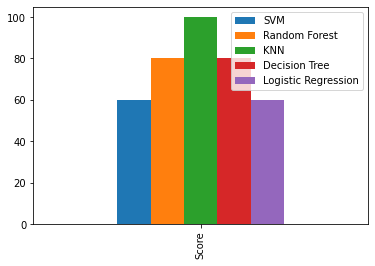

In [24]:
results.plot(kind='bar')